# IBS 574 Python Homework 3


#### Add your name and the date your notebook was last updated

In [1]:
%load_ext watermark
%watermark -a "Yijian Fan" -d -u -n -t -z

Yijian Fan 
last updated: 2020-02-11 14:20:30 Eastern Standard Time


#### Load libraries

In [43]:
import pandas as pd
import numpy as np
from sinfo import sinfo
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
import matplotlib.pyplot as plt #for later add the title

#### Load data
Hint: data are available here https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv

In [3]:
countdata = "http://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col = 0, sep = "\t")
len(counts) == 14944

True

#### Transpose Count

In [4]:
counts_transpose = counts.T #name the transposed data as count_transpose
len(counts_transpose) == 14

True

#### Add a column of target values to the transposed data frame


In [5]:
group = ["Control","Control", "Control", "Control", "Control", "Control", "Control", "Case", "Case", "Case", "Case", "Case", "Case", "Case" ]
counts_transpose["group"] = group

#### Perform Scaling

In [6]:
features = pd.Series(counts_transpose.columns)[0:14944] #assign all column except the control/case one to features
feature_arr = counts_transpose.loc[:, features].values #only takes the value out of it
target_arr = counts_transpose.loc[:, ['group']].values 
fitted_features = StandardScaler().fit_transform(feature_arr) # median center the values for PCA plot later

#### Determine Principle Components & Combine with Target


In [25]:
random.seed(888)
pca = PCA(n_components=2, random_state = 888)
principalComponents = pca.fit_transform(fitted_features) # calculate principle components 1 and 2 from the data, assign to principalComponents
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2']) # use a function from pandas, and name two columns as PC1, PC2, can be named other staff
principalDataframe.index = counts_transpose.index 
targetDataframe = counts_transpose[["group"]]
newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1) #join the data and the control/case label together

#### Test that principal Components were computed correctly & combined successfully


In [8]:
principalDataframe["PC1"].max() == 126.57815113747387

True

#### Graph the principal components by sample group

Text(0.5, 1, 'PCA for Homework')

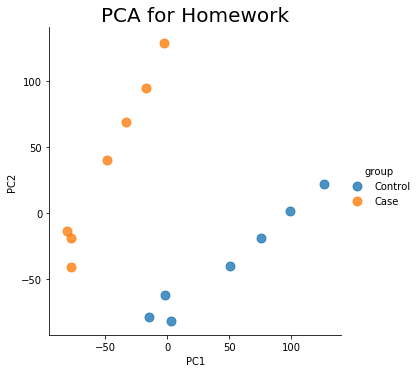

In [42]:
sns.lmplot( x="PC1", y="PC2",
          data = newDataframe,
          fit_reg=False,
          hue='group', #color by cluster
          legend=True,
          scatter_kws={"s": 80}) #specify the point size
plt.title("PCA for Homework", fontsize = 20) #add the title

#### Interpret the graph for your principal investigator using the explained variance

In [12]:
pca.explained_variance_ratio_

array([0.39218002, 0.36808828])

Approximately 39% of the variability between thee sample groups is expplained by a sample being either a case or a control.
Approximately 37% can be attribute to another variable unaccountable for in the experimental design.

Text(0.5, 1, 'Try boxplot')

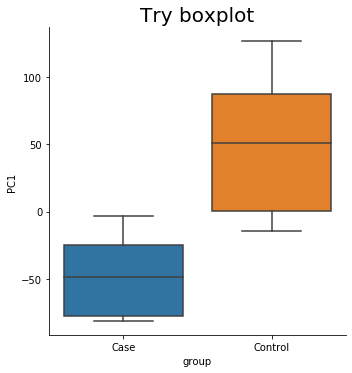

In [53]:
sns.catplot(x="group", y="PC1", kind="box", order = ["Case", "Control"], data=newDataframe);
plt.title ("Try boxplot", fontsize = 20)

Text(0.5, 1, 'Try Size Thing See how it looks')

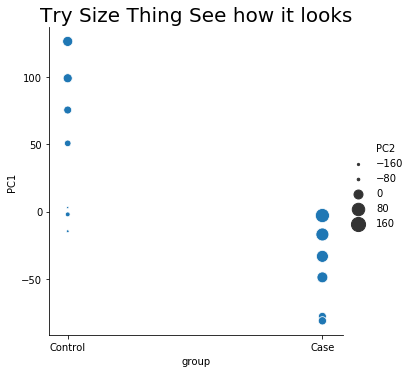

In [57]:
sns.relplot(x="group", y="PC1", size="PC2", sizes=(5,200), data=newDataframe);
plt.title ("Try Size Thing See how it looks", fontsize = 20)

#### Report Session Information

In [54]:
sinfo()

-----
matplotlib  3.1.3
numpy       1.18.1
pandas      1.0.0
seaborn     0.10.0
sinfo       0.3.1
sklearn     0.22.1
-----
IPython             7.11.1
jupyter_client      5.3.4
jupyter_core        4.6.1
notebook            6.0.3
-----
Python 3.8.1 (default, Jan  8 2020, 15:55:49) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.18362-SP0
4 logical CPU cores, Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
-----
Session information updated at 2020-02-11 15:42
